In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white",context="notebook",palette="muted")
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
display(train.head(),test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
full = pd.concat([train, test], ignore_index=True)
# full.to_csv('./full_titanic.csv',index=False)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='Embarked', ylabel='Survived'>

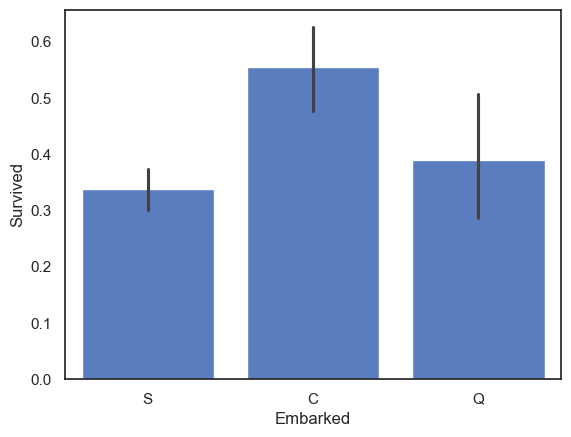

In [7]:
sns.barplot(data=train,x="Embarked",y="Survived")

In [8]:
s = full.groupby(["Embarked"])['Survived'].value_counts().to_frame().reset_index()
display(s)
s2 = s.groupby(["Embarked"]).apply(lambda x: x / x.sum()).reset_index()
display(s2)
pd.merge(s, s2, on=["Embarked", "Survived"], suffixes=['_num', '_rate'])

,Embarked,Survived,count
0,C,1.0,93
1,C,0.0,75
2,Q,0.0,47
3,Q,1.0,30
4,S,0.0,427
5,S,1.0,217


,Embarked,level_1,Survived,count
0,C,0,1.0,0.553571
1,C,1,0.0,0.446429
2,Q,2,0.0,0.610390
3,Q,3,1.0,0.389610
4,S,4,0.0,0.663043
5,S,5,1.0,0.336957


,Embarked,Survived,count_num,level_1,count_rate
0,C,1.0,93,0,0.553571
1,C,0.0,75,1,0.446429
2,Q,0.0,47,2,0.610390
3,Q,1.0,30,3,0.389610
4,S,0.0,427,4,0.663043
5,S,1.0,217,5,0.336957


In [9]:
print(full.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


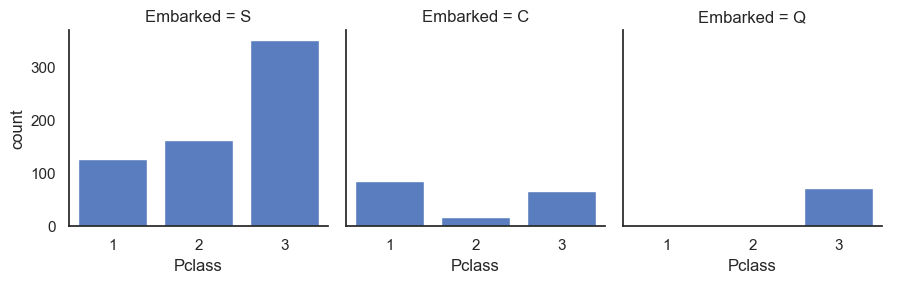

In [10]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count', height=3)

<Axes: xlabel='Parch', ylabel='Survived'>

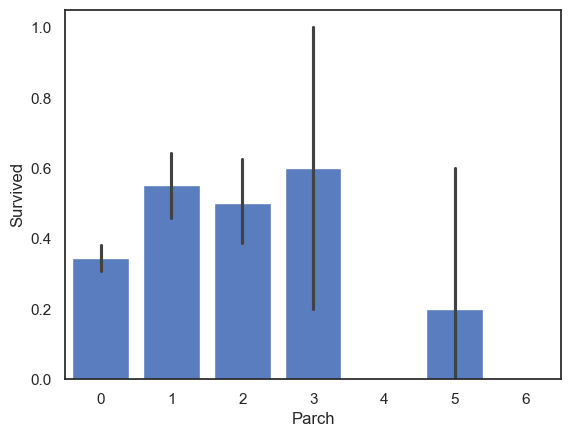

In [11]:
sns.barplot(data=train,x='Parch',y='Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

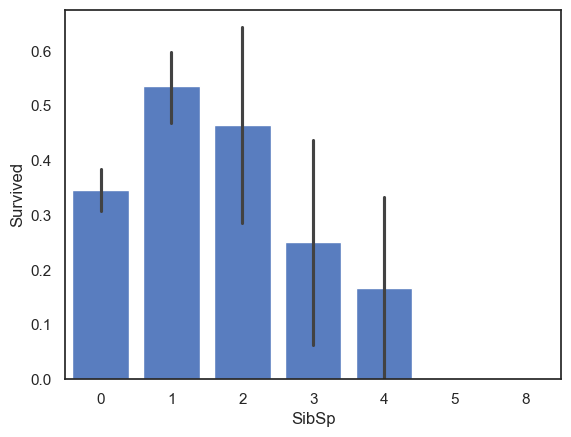

In [12]:
sns.barplot(data=train,x='SibSp',y='Survived')

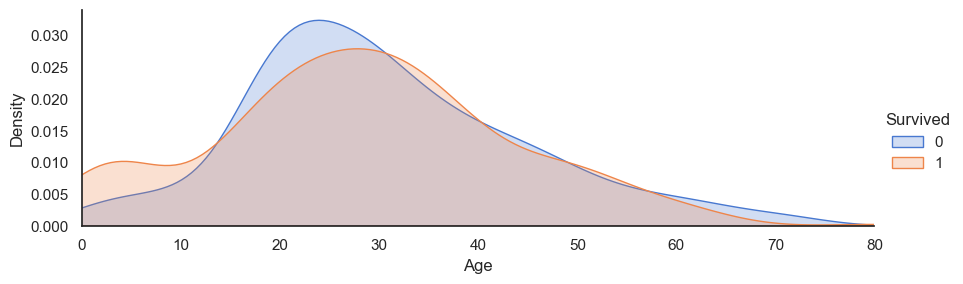

In [13]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Age',shade=True)
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

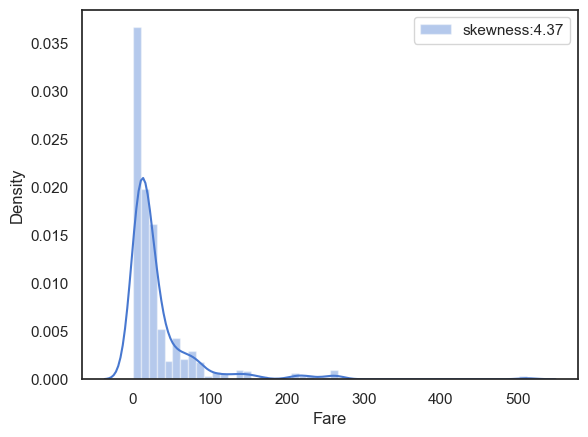

In [14]:
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

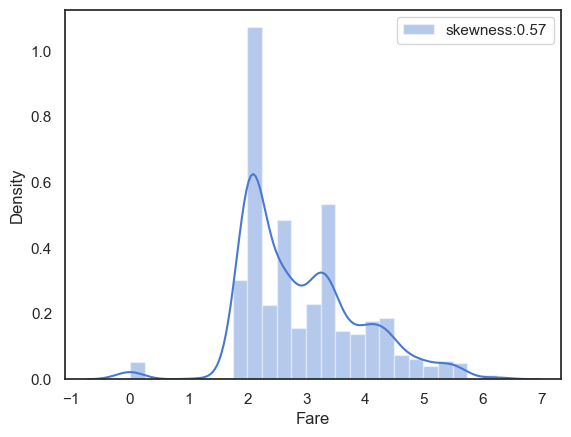

In [15]:
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x > 0 else x)
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew())) 
farePlot.legend(loc='best')
plt.savefig('./Fare票价分布.png',dpi = 200)

In [16]:
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [17]:
display(full[full['Embarked'].isnull()])
display(full['Embarked'].value_counts())
full['Embarked']=full['Embarked'].fillna('S')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [18]:
display(full[full['Fare'].isnull()])
price = full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean()
full['Fare']=full['Fare'].fillna(price)
full.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [19]:
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [20]:
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'
full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Title
Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

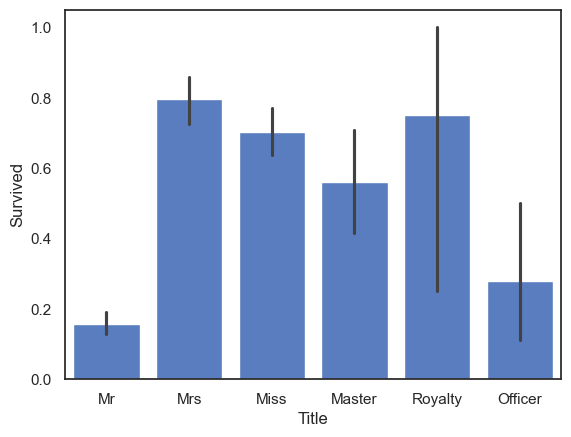

In [21]:
sns.barplot(data=full,x='Title',y='Survived')

<Axes: xlabel='familyNum', ylabel='Survived'>

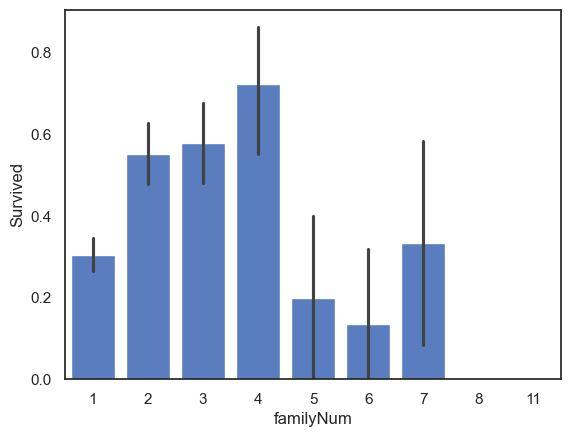

In [22]:
full['familyNum']=full['Parch']+full['SibSp'] + 1
sns.barplot(data=full,x='familyNum',y='Survived')

In [23]:
def familysize(familyNum):
    if familyNum== 1 :
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2
full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

familySize
0    790
1    437
2     82
Name: count, dtype: int64

<Axes: xlabel='familySize', ylabel='Survived'>

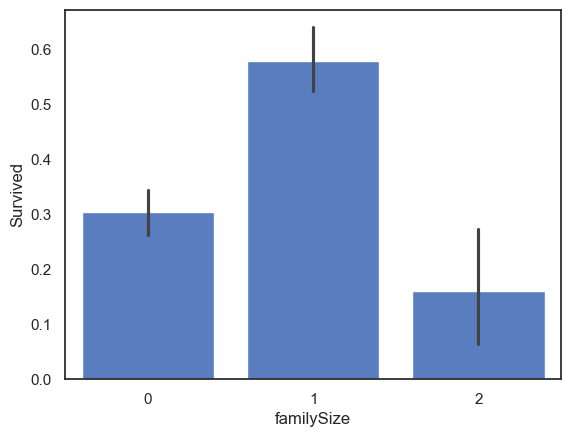

In [24]:
sns.barplot(data=full,x='familySize',y='Survived')

In [25]:
full['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<Axes: xlabel='Deck', ylabel='Survived'>

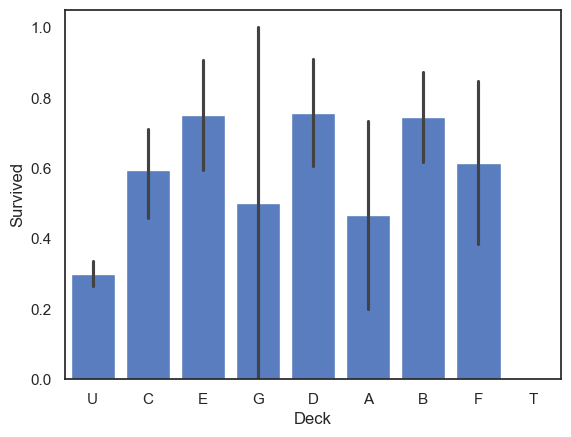

In [26]:
full['Deck']=full['Cabin'].map(lambda x:x[0])
sns.barplot(data=full,x='Deck',y='Survived')

In [27]:
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head(20)

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
347077           7
347082           7
3101295          7
19950            6
113781           6
347088           6
382652           6
4133             5
W./C. 6608       5
PC 17757         5
349909           5
220845           5
113503           5
16966            5
LINE             4
Name: count, dtype: int64

<Axes: xlabel='TickCom', ylabel='Survived'>

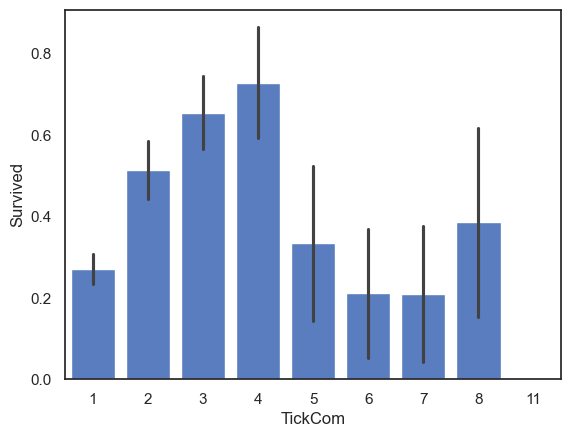

In [28]:
full['TickCom']=full['Ticket'].map(TickCountDict)
full['TickCom'].head()
sns.barplot(data=full,x='TickCom',y='Survived')

In [29]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCom
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,1,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,0,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,1,C,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,0,U,1


<Axes: xlabel='TickGroup', ylabel='Survived'>

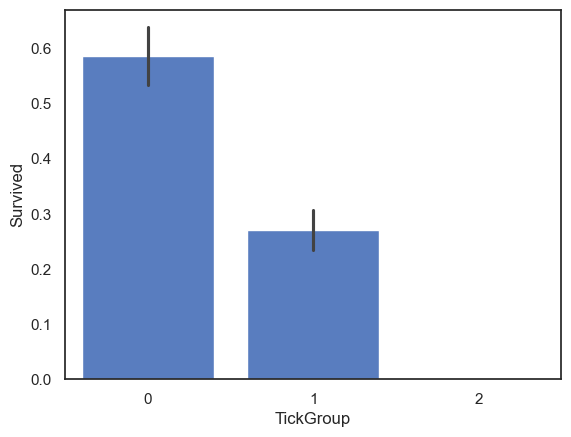

In [30]:
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
full['TickGroup']=full['TickCom'].map(TickCountGroup)
sns.barplot(data=full,x='TickGroup',y='Survived')

In [31]:
full.select_dtypes(include=[np.number])[full['Age'].notnull()].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familyNum,familySize,TickCom,TickGroup
PassengerId,1.000000,0.029340,-0.064097,0.028814,-0.050700,-0.021096,0.038722,-0.044024,-0.048093,-0.013838,-0.005325
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.342920,0.042787,0.106359,0.093239,-0.322862
Pclass,-0.064097,-0.359653,1.000000,-0.408106,0.047221,0.017224,-0.741394,0.039602,-0.074864,-0.114293,0.311226
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.194038,-0.240229,-0.174901,-0.185284,-0.005224
SibSp,-0.050700,-0.017358,0.047221,-0.243699,1.000000,0.374456,0.294004,0.844260,0.779310,0.621362,-0.131130
Parch,-0.021096,0.093317,0.017224,-0.150917,0.374456,1.000000,0.318137,0.813080,0.705738,0.641500,-0.162860
Fare,0.038722,0.342920,-0.741394,0.194038,0.294004,0.318137,1.000000,0.368463,0.451368,0.603769,-0.439788
familyNum,-0.044024,0.042787,0.039602,-0.240229,0.844260,0.813080,0.368463,1.000000,0.897180,0.760887,-0.176458
familySize,-0.048093,0.106359,-0.074864,-0.174901,0.779310,0.705738,0.451368,0.897180,1.000000,0.661291,-0.401090
TickCom,-0.013838,0.093239,-0.114293,-0.185284,0.621362,0.641500,0.603769,0.760887,0.661291,1.000000,-0.203938


In [32]:
agePre=full[['Age','Parch','Pclass','SibSp','familyNum','TickCom','Title']]  
agePre=pd.get_dummies(agePre)
ageCorrDf=agePre.corr()
ageCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCom         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [33]:
agePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,3,1,2,1,False,False,True,False,False,False
1,38.0,0,1,1,2,2,False,False,False,True,False,False
2,26.0,0,3,0,1,1,False,True,False,False,False,False
3,35.0,0,1,1,2,2,False,False,False,True,False,False
4,35.0,0,3,0,1,1,False,False,True,False,False,False


In [34]:
ageKnown=agePre[agePre['Age'].notnull()]
ageUnKnown=agePre[agePre['Age'].isnull()]
ageKnown_X=ageKnown.drop(['Age'],axis=1)
ageKnown_y=ageKnown['Age']
ageUnKnown_X=ageUnKnown.drop(['Age'],axis=1)
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(ageKnown_X,ageKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [35]:
score = rfr.score(ageKnown_X,ageKnown_y)
print('模型预测年龄得分：',score)
ageUnKnown_predict = rfr.predict(ageUnKnown_X)
full.loc[full['Age'].isnull(),['Age']] = ageUnKnown_predict
full.info()

模型预测年龄得分： 0.586642948052482
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64

In [36]:
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]

MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()female

SyntaxError: invalid syntax (4084243425.py, line 8)

In [ ]:
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

In [ ]:
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5

full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60


In [ ]:
fullSel = full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
fullSel = fullSel.select_dtypes(include=[np.number])
corrDf = fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

In [ ]:
plt.figure(figsize=(8,8))   
sns.heatmap(fullSel.corr(),cmap='BrBG',annot=True,linewidths=.5)
_ = plt.xticks(rotation=45)

In [ ]:
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
fullSel=fullSel.drop(['Age','Parch','SibSp','familyNum','TickCom'],axis=1)
fullSel=pd.get_dummies(fullSel)
fullSel.head()

In [ ]:
experData=fullSel[fullSel['Survived'].notnull()]  # 训练数据
preData=fullSel[fullSel['Survived'].isnull()]   # 预测数据
experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)  # 空数据

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

kfold=StratifiedKFold(n_splits=10)

classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

In [ ]:
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))   
 
# 求模型得分均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std()) 
   
# 汇总
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LDA','Xgboost']})
cvResDf

In [ ]:
cvResDf_sorted = cvResDf.sort_values(by='cv_mean',ascending=False)
cv_std_series = pd.Series(cv_std, index=cvResDf.index)
cv_std_sorted = cv_std_series[cvResDf_sorted.index]

plt.barh(cvResDf_sorted['algorithm'], cvResDf_sorted['cv_mean'], xerr=cv_std_sorted, align='center')
plt.xlim(0.7, 0.9)
plt.xlabel('cv_mean')
plt.title('Algorithm')

In [ ]:
print(cv_std_sorted.shape)
print(cvResDf_sorted['cv_mean'].shape)

In [ ]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["exponential", "log_loss"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]}
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)
modelgsGBC.best_score_

In [ ]:
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)
modelgsLR.best_score_

In [ ]:
svc = SVC()
gb_param_grid = {'C' : [0.1,0.5,1,2,3,5,10],
              'kernel':['rbf','poly','sigmoid']}
modelgsSVC = GridSearchCV(svc,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsSVC.fit(experData_X,experData_y)
modelgsSVC.best_score_

In [ ]:
lda = LinearDiscriminantAnalysis()
gb_param_grid = {'solver' : ['svd', 'lsqr', 'eigen'],
              'tol':[0.000001,0.00001,0.0001,0.001,0.01]}
modelgsLDA = GridSearchCV(lda,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLDA.fit(experData_X,experData_y)
modelgsLDA.best_score_

In [ ]:
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int) # 求测试数据模型预测值
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) # 计算真正率和假正率
roc_auc = auc(fpr,tpr) # 计算auc值面积
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) # 假正率为横坐标 真正率为纵坐标
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")  # 图例
plt.show()  # GBC模型得分

In [ ]:
modelgsLRtestpre_y=modelgsLR.predict(experData_X).astype(int)   # LR模型roc曲线
from sklearn.metrics import roc_curve, auc 
fpr,tpr,threshold = roc_curve(experData_y, modelgsLRtestpre_y) 
roc_auc = auc(fpr,tpr)
plt.figure() 
lw = 2 
plt.figure(figsize=(10,10)) 
plt.plot(fpr, tpr, color='r', 
lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Titanic LogisticRegression Model') 
plt.legend(loc="lower right") 
plt.show()

In [ ]:
modelgsSVCtestpre_y=modelgsSVC.predict(experData_X).astype(int)  # SVC模型roc曲线
from sklearn.metrics import roc_curve, auc  
fpr,tpr,threshold = roc_curve(experData_y, modelgsSVCtestpre_y)
roc_auc = auc(fpr,tpr)  # 计算ROC曲线下的面积
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic SVC Model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
print('GradientBoostingClassifier模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsGBCtestpre_y))
print('LogisticRegression模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsLRtestpre_y))
print('SVC模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsSVCtestpre_y))

In [ ]:
y_ =modelgsGBC.predict(preData_X)
y_ = y_.astype(int)
GBCpreResultDf=pd.DataFrame()  # 导出预测结果
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']= y_
GBCpreResultDf
GBCpreResultDf.to_csv('./predict_titanic.csv',index=False) # 导出为csv
display(GBCpreResultDf.head())

In [ ]:
test